# $$Transformação~de~Box- Cox: Regressão~Linear~Multipla $$

### $$Conceito:$$

**Transformação de Box cox** é definida como uma forma de transformar variáveis dependentes não normais em uma forma normal através da transformação logarítmica


Quando o modelo de regressão de mínimos quadrados, que assume que os erros possuem distribuição normal com variância constante é violado, torna-se necessário a utilização de algum procedimento visando à correção desta falha, portanto pode-se utilizar o método de transformação Box-Cox que é um tipo de transformação para tentar normalizar os dados


O **valor de lambda** é considerado melhor se for capaz de aproximar a curva não normal de uma curva normal


**OBS:** Box-cox não garante a normalidade, portanto é sempre necessário verificar a distribuição dos resíduos após a transformação da variável.

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$  

## $$Usar~a~ transformação ~de~ Box-Cox ~na ~variável~ target$$$$para~ que~ os~ residuos~ sejam ~aderentes~ à~ normalidade$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
#Pacotes
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Banco de dados 

In [2]:
#Carregar tabela
dados = pd.read_table("empresas.csv",sep=",",encoding="latin-1")
dados = dados.set_index('empresa')
dados


,retorno,disclosure,endividamento,ativos,liquidez
empresa,,,,,
Adidas,63.67,83,1.3,3967,14.3
BASF,55.49,91,33.9,5450,16.8
Bayer,52.42,77,36.1,4327,15.5
BSH,54.00,90,20.8,4109,16.8
Bosch,68.01,93,14.1,4458,17.0
...,...,...,...,...,...
DuPont,39.85,41,49.5,2996,10.5
ExxonMobil,44.16,35,16.8,3622,12.3
FedEx,45.38,24,16.1,2972,9.7


**Tabela com 124 observações e 5 variáveis**

# $$Dicionário~ de~ Dados~ das~ Variáveis$$ 

### **$$Variáveis:$$**

**empresa:** Nome da Empresa


**retorno:** Retorno da ação negociada no mercado em determinado período em percentual

    
**disclosure:** Grau(nota) de transparência com que as informações contábil e financeira são apresentadas no mercado


**endividamento:** Endividamento em percentual do patrimônio líquido da empresa 


**ativos:** Ativos totais da empresa em Milhões de dólares


**liquidez:** Quanto da dívida no curto prazo a empresa consegue honrar


    


# Análise Exploratória

In [3]:
#Info da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, Adidas to General Electric
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   retorno        124 non-null    float64
 1   disclosure     124 non-null    int64  
 2   endividamento  124 non-null    float64
 3   ativos         124 non-null    int64  
 4   liquidez       124 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.8+ KB


**Todas variáveis são quantitativas**

In [4]:
#Descrição dos dados
dados.describe()

,retorno,disclosure,endividamento,ativos,liquidez
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,46.195484,49.677419,27.734677,3739.064516,12.300000
std,15.075886,31.338059,12.454287,1538.500462,3.141746
min,21.030000,6.000000,1.200000,1851.000000,7.900000
25%,33.840000,18.000000,18.525000,2597.000000,9.300000
50%,44.175000,41.000000,24.950000,3476.000000,12.200000
75%,58.205000,83.000000,34.125000,4458.000000,15.800000
max,86.180000,98.000000,64.900000,9010.000000,17.000000


<AxesSubplot:>

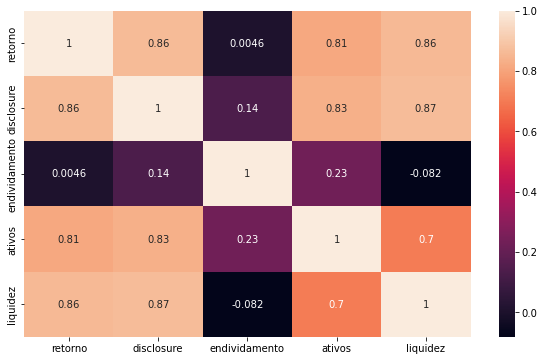

In [5]:
#Correlação
plt.figure(figsize=(10, 6))
sns.heatmap(dados.corr(),annot = True)

**A única variável que tem pouca ou nenhuma correlação com as outras variáveis é a 'endividamento'**

# Modelagem

In [6]:
#Separar as variáveis X e Y

x = dados[['disclosure','endividamento', 'ativos', 'liquidez']]
y = dados['retorno']


**Separar as variáveis explicativas da variável target**

In [7]:
#Modelo
import statsmodels.api as sm

# Adicionar uma constante nas variaveis x
x1 = sm.add_constant(x)
y = y.values

#Criar modelo
modelo = sm.OLS(y,x1)

#Treinar o modelo
modelo1 = modelo.fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     147.9
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           3.35e-45
Time:                        08:49:18   Log-Likelihood:                -401.07
No. Observations:                 124   AIC:                             812.1
Df Residuals:                     119   BIC:                             826.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.0506      4.080      1.483      0.141      -2.028      14.129
disclosure        0.1067      0.048      2.227      0.028       0.012       0.202
endividamento    -0.0882      0.051     -1.723      0.087      -0.190       0.013
ativos            0.0035      0.001      5.134      0.000       0.002       0.005
liquidez          1.9762      0.396      4.987      0.000       1.191       2.761
==============================================================================
Omnibus:                       35.509   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.127
Skew:                          -0.136   Prob(JB):                       0.0283
Kurtosis:                       1.858   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Analisando os P_values podemos concluir que a variável 'endividamento' não é estatisticamente significante para o modelo a um nível de significância de 5%**

In [8]:
#Criando o 2° Modelo , excluindo a variável 'endividamento'
x_linear1 = dados[['disclosure','ativos', 'liquidez']]
y = dados['retorno']

**Estimar o modelo novamente sem a variável explicativa 'endividamento'**

In [9]:
#Modelo 2
import statsmodels.api as sm
x1_linear1 = sm.add_constant(x_linear1)# Adicionar uma constante nas variaveis x
y = y.values
modelo = sm.OLS(y,x1_linear1)
modelo2 = modelo.fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     193.1
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           9.55e-46
Time:                        08:49:18   Log-Likelihood:                -402.60
No. Observations:                 124   AIC:                             813.2
Df Residuals:                     120   BIC:                             824.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0461      3.380      0.605      0.546      -4.647       8.739
disclosure     0.0874      0.047      1.861      0.065      -0.006       0.180
ativos         0.0032      0.001      4.850      0.000       0.002       0.005
liquidez       2.2507      0.366      6.152      0.000       1.526       2.975
==============================================================================
Omnibus:                       18.497   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.349
Skew:                          -0.103   Prob(JB):                       0.0689
Kurtosis:                       2.003   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Agora veja que a variável 'disclousere' não é estatisticamente significante para o modelo a um nível de significância de 5% na presença das outra variáveis explicativas(Multicolinearidade)**

## SetpWise

- Seleciona as variáveis explicativas, que na presença nas demais apresentam parâmetros estatisticamente significantes

In [10]:
import warnings
warnings.filterwarnings('ignore')
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

result = stepwise_selection(x, y)


Add  disclosure                     with p-value 4.06399e-38
Add  liquidez                       with p-value 4.12259e-07
Add  ativos                         with p-value 3.73853e-06
Drop disclosure                     with p-value 0.0651403


**Utilizamos o algoritmo Step-Wise para selecionar o maior número de variáveis estatisticamente significantes**

In [11]:
#Variáveis selecionada pelo StepWise
result

['liquidez', 'ativos']

**Apenas as variáveis estatisticamente significantes para o modelo**

In [12]:
#Modelo3

#add na variável x, apenas as variáveis estatisticamente significantes para o modelo
x2_linear2 = dados[result] 

# Adicionar uma constante nas variaveis x
x2_linear2 = sm.add_constant(x2_linear2)
y = y

#Criar o modelo
modelo = sm.OLS(y,x2_linear2)
modelo3 = modelo.fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     282.1
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           2.76e-46
Time:                        08:49:19   Log-Likelihood:                -404.37
No. Observations:                 124   AIC:                             814.7
Df Residuals:                     121   BIC:                             823.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5348      2.341     -1.083      0.281      -7.169       2.100
liquidez       2.7391      0.258     10.637      0.000       2.229       3.249
ativos         0.0040      0.001      7.649      0.000       0.003       0.005
==============================================================================
Omnibus:                       23.591   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.887
Skew:                          -0.087   Prob(JB):                       0.0527
Kurtosis:                       1.947   Cond. No.                     1.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note que agora todas as variáveis explicativas são estatisticamente significantes para o modelo a um nível de significância de 5%**

## Teste de Shapiro-Francia (Teste de verificação da aderência dos resíduos à normalidade)

Shapiro-Wilk: número de amostras <= 30

Shapiro-Francia: número de amostras > 30


In [13]:
#Teste de Shapiro Francia
import scipy.stats as stats
shapiro_stats, shapiro_p_valor = stats.shapiro(modelo3.resid)
print(f'Valor do teste de Shapiro Francia= {shapiro_p_valor:.6f}, é menor que 0.05 , Portanto não ha Distribuiçao Normal')

Valor do teste de Shapiro Francia= 0.005130, é menor que 0.05 , Portanto não ha Distribuiçao Normal


**O que se espera do teste de Shapiro é que o valor do teste seja maior que 0.05, sendo assim, os resíduos aderem a uma distribuição normal, onde a maioria dos dados fica dentro do intervalo de confiança da reta de regressão**

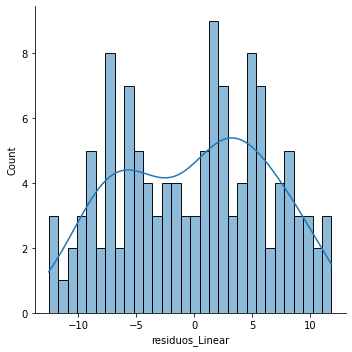

In [14]:
#Histograma da Aderência dos residuos

#transformar os redisuos em uma coluna
dados['residuos_Linear']=modelo3.resid

#Construir o histograma
sns.displot(dados['residuos_Linear'],kde=True,bins=30);
plt.show()

**Para que haja aderência entre a distribuição normal e a distribuição real dos resíduos a um nível de significância de 5%, 95% dos dados tem que estar dentro da curva da distribuição normal**

**Como os resíduos não são aderentes a uma distribuição normal, temos que fazer a transformação de BOX-COX**

## Transformação de Box-Cox - Distribuição Nao Linear

- Temos que transformar a variável Y, para que a distribuição dos resíduos seja aderente a uma distribuição normal


- Valor de lambda (Λ) varia entre  – ∞ à + ∞


- Qual o valor de Lambda (Λ), que maximiza a aderência da distribuição da nova variável Y à normalidade?



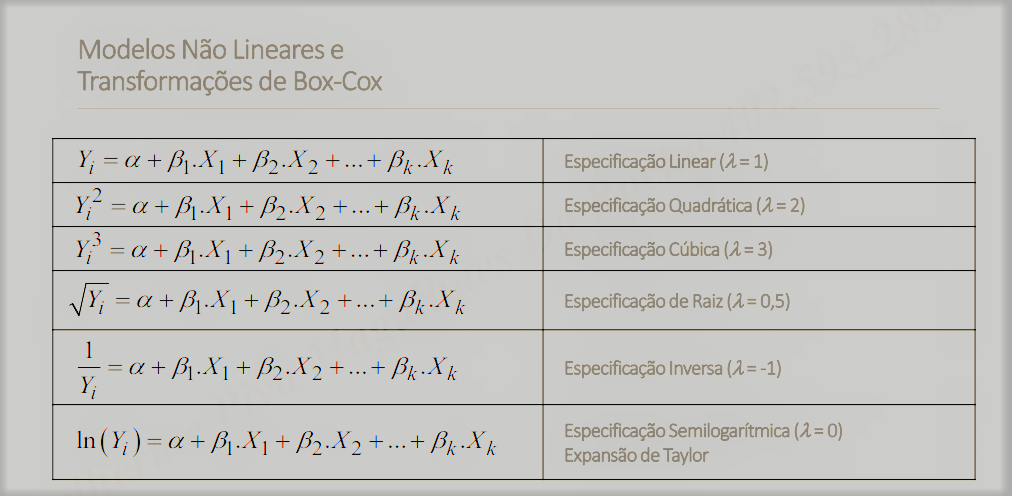

In [15]:
#Valores de lambda e suas especificações
from IPython.display import Image
Image(filename="BoxCox.png")

In [16]:
#Calculo do Lambda
from scipy.stats import boxcox
from scipy.special import inv_boxcox

dados_transform, lambda_boxcox = boxcox(dados['retorno'])
lambda_boxcox

-0.022564100754067663

**O lambda que maximiza a aderência da Nova variável Y há normalidade é -0.022564..., Especificação Semi-logarítmica**

In [17]:
#Inserindo o lambda de Box-Cox na base de dados para a estimação de um novo modelo
dados['y_boxcox'] = (((dados['retorno']**lambda_boxcox) -1) / lambda_boxcox)
dados.head(5)

,retorno,disclosure,endividamento,ativos,liquidez,residuos_Linear,y_boxcox
empresa,,,,,,,
Adidas,63.67,83,1.3,3967,14.3,11.079540,3.965002
BASF,55.49,91,33.9,5450,16.8,-9.913203,3.839599
Bayer,52.42,77,36.1,4327,15.5,-4.905376,3.787582
BSH,54.00,90,20.8,4109,16.8,-6.009319,3.814731
Bosch,68.01,93,14.1,4458,17.0,6.049088,4.024999


**Observe que foi criada uma variável target transformada em uma Box-Cox**

In [18]:
#Selecionar x e y para criação do modelo StepWise
x_boxcox = dados[['disclosure','endividamento', 'ativos', 'liquidez']]
y = dados['y_boxcox']

In [19]:
#Stepwise
result1 = stepwise_selection(x_boxcox, y)

Add  disclosure                     with p-value 4.37018e-38
Add  liquidez                       with p-value 5.2495e-06
Add  ativos                         with p-value 0.00604559


In [20]:
#Variáveis selecionada pelo StepWise
result1

['disclosure', 'liquidez', 'ativos']

**Observe que a variável 'disclousure' é estatisticamente significante a um nível de significância de 5% na presença das variáveis 'liquidez' e 'ativos' na forma funcional não linear**

In [21]:
#Modelo4

x_boxcox = dados[result1]

# Adicionar uma constante nas variaveis x
x_boxcox = sm.add_constant(x_boxcox)
y = y

#Criar modelo
modelo = sm.OLS(y,x_boxcox)
modelo_boxcox = modelo.fit()
modelo_boxcox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               y_boxcox   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     159.0
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.21e-41
Time:                        08:49:19   Log-Likelihood:                 73.887
No. Observations:                 124   AIC:                            -139.8
Df Residuals:                     120   BIC:                            -128.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8275      0.072     39.019      0.000       2.684       2.971
disclosure     0.0031      0.001      3.109      0.002       0.001       0.005
liquidez       0.0398      0.008      5.080      0.000       0.024       0.055
ativos      4.005e-05   1.43e-05      2.795      0.006    1.17e-05    6.84e-05
==============================================================================
Omnibus:                        2.714   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.472
Skew:                          -0.258   Prob(JB):                        0.290
Kurtosis:                       2.540   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observamos que os p_values das variáveis são estatisticamente significantes a um nível de significância de 5%**

In [22]:
#Verificando a normalidade dos resíduos do modelo 

#Teste de Shapiro Francia
shapiro_stats, shapiro_p_valor = stats.shapiro(modelo_boxcox.resid)
print(f'Valor do teste de Shapiro Francia= {shapiro_p_valor:.6f}')

Valor do teste de Shapiro Francia= 0.175174


**Valor do teste de Shapiro Francia = 0.175174 > 0.05 , Portanto há aderência dos resíduos há uma distribuição normal**

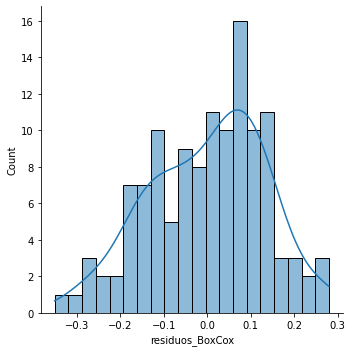

In [23]:
 #Histograma da Aderência dos residuos

#transformar os redisuos em uma coluna
dados['residuos_BoxCox']=modelo_boxcox.resid

#Construir o histograma
sns.displot(dados['residuos_BoxCox'],kde=True,bins=20);
plt.show()

**Veja que há aderência dos resíduos a uma distribuição normal**

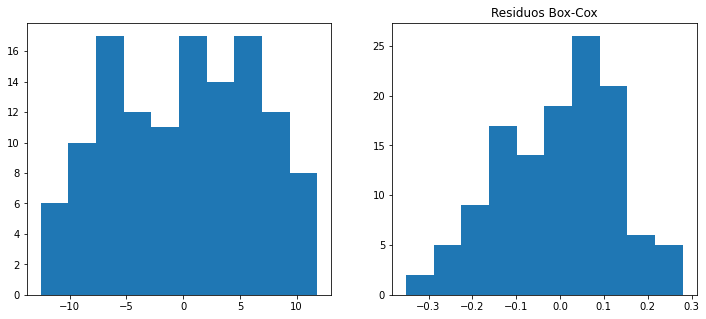

In [24]:
#Comparação dos residuos

#Construir o histograma
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axes = axes.ravel()

#Criar coluna dos residuos
dados['residuos_Linear']=modelo3.resid

# #Grafico de dispersão: Dados reais
axes[0].hist(dados['residuos_Linear'])


#Criar coluna dos residuos
dados['residuos_BoxCox']=modelo_boxcox.resid

# #Grafico de dispersão: Box-Cox
axes[1].hist(dados['residuos_BoxCox'])
plt.title('Residuos Box-Cox');

plt.show()

**Observe a diferença nos resíduos com e sem a transformação de Box-Cox**

## Predições com modelos OLS linear e Box-Cox

In [25]:
#Predições com os modelos OLS linear 
dados['Pred_linear'] = modelo3.predict(x2_linear2)

#Predições com os modelos OLS Box-Cox
pred_boxcox = modelo_boxcox.predict(x_boxcox)

#Não podemos nos esquecer de fazer o cálculo inverso da Box-Cox para a obtenção do fitted
dados['Pred_boxcox'] = (((pred_boxcox * lambda_boxcox) + 1)) ** (1 / lambda_boxcox)

#Base de dados com as predições
dados[['retorno','Pred_linear','Pred_boxcox']]

,retorno,Pred_linear,Pred_boxcox
empresa,,,
Adidas,63.67,52.590460,54.072393
BASF,55.49,65.403203,66.165319
Bayer,52.42,57.325376,56.706216
BSH,54.00,60.009319,62.161048
Bosch,68.01,61.960912,64.337230
...,...,...,...
DuPont,39.85,38.276327,38.078000
ExxonMobil,44.16,45.724617,41.446025
FedEx,45.38,35.988530,34.685312


**Variável Tagert (retorno), junto com as predições**

## Comparação dos modelos (Linear e Não Linear)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

#Modelo de regressão linear
mse1 = mean_squared_error(dados['retorno'],dados['Pred_linear'])
mae1 = mean_absolute_error(dados['retorno'],dados['Pred_linear'])

#Modelo não linear
mse2 = mean_squared_error(dados['retorno'],dados['Pred_boxcox'])
mae2 = mean_absolute_error(dados['retorno'],dados['Pred_boxcox'])

#Criar tabela com as métricas
metricas = {'MSE':mse1,'MAE':mae1}
metricas1 = [mse2,mae2]
metricas = pd.DataFrame(list(metricas.items()),columns=['Metricas','Dados Reais'])
metricas1 = pd.DataFrame(metricas1)

metricas['Box-Cox'] = metricas1

metricas = metricas.set_index('Metricas')

metricas

,Dados Reais,Box-Cox
Metricas,,
MSE,39.811412,37.365001
MAE,5.446840,5.213502


**Verificando as métricas MSE e MAE, confirmamos que o modelo não linear (Box-Cox) apresenta um resultado melhor do que o modelo linear**

## Plots

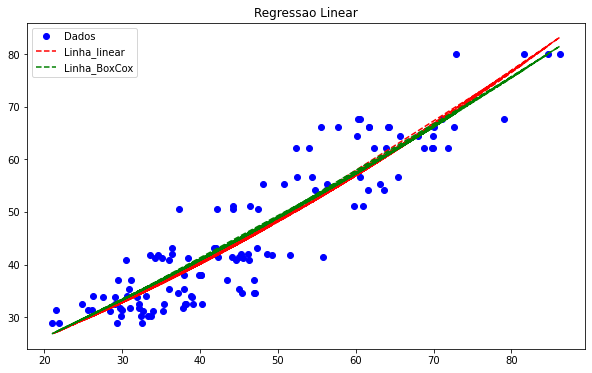

In [27]:
# #Grafico de comparação entre as 2 formas funcionais
import warnings
warnings.filterwarnings('ignore')
x = dados['retorno']
y = dados['Pred_boxcox']
d = dados['Pred_linear']

plt.figure(figsize=(10, 6))

deg = 2
z = np.polyfit(x, y, deg)
y2 = np.poly1d(z)
plt.plot(x, y, "bo",color='b')
plt.plot(x, y2(x), "--",color='r',markersize=3)

d1 = np.polyfit(x, d, deg)
d2 = np.poly1d(d1)
plt.plot(x, d2(x), "--",color='g',markersize=3)
plt.title('Regressao Linear')
plt.legend(['Dados','Linha_linear','Linha_BoxCox'])
plt.show()


# Conclusão

**Apesar das duas formas funcionais (Linear e não linear) serem semelhantes, com a transformação de box-cox os resíduos do modelo ficam aderentes a normalidade, e quanto maior o dataset mais evidente fica a disparidade entre os modelos**